In [1]:
import pandas as pd

In [2]:
# 1) Importe o Dataframe

df = pd.read_csv('dataframe_exercicio_modulo_7.csv')
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


In [3]:
# 2) Qual as dimensões do dataframe?

print(f"O dataframe tem { df.shape[1] } colunas e { df.shape[0] } linhas.")

O dataframe tem 9 colunas e 29170 linhas.


In [4]:
# 3) Quais os tipos das variáveis?
 
print(f'Os tipos das variáveis do dataframe seguem conforme abaixo\n', df.dtypes)

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

In [5]:
# 4) Existe dados faltantes no dataframe?

percentual = ((df.isnull().sum()/ df.shape[0]) * 100).round(2)
print(f"A quantidade total de itens faltantes é: { df.isnull().sum().sum() }. O percentual de itens faltantes é:\n", percentual)


A quantidade total de itens faltantes é: 58439. O percentual de itens faltantes é:
 idade                 0.34
tempo_educacao        0.00
estado_civil          0.00
cor                   0.00
sexo                  0.00
horas_por_semana      0.00
salario_anual         0.00
nome                100.00
dívida              100.00
dtype: float64


In [6]:
print(df['estado_civil'].value_counts())
print('\n', df['cor'].value_counts())
print('\n', df['sexo'].value_counts())

print('\nDe acordo com os dados acima, nas variáveis cor e sexo há valores faltantes.')

Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64

 White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64

 Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

De acordo com os dados acima, nas variáveis cor e sexo há valores faltantes.


In [7]:
df.sexo.value_counts()

Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

In [35]:
def preprocessamento(df, cols_numericas, cols_categoricas):
    dff = df.copy()
    temp = (df.isnull().sum() / df.shape[0]) >= 0.8
    variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
    
    for v in variaveis_80percFaltantes:
        dff = dff.drop(v, axis = 1)
        
    cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist())))
    cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist())))
        
    for v in cols_numericas:
        dff[v] = dff[v].fillna(dff[v].mean())
        
    for v in cols_categoricas:
        mode_v = dff[v].value_counts().idxmax()
        dff[v] = dff[v].fillna(mode_v)
    return dff

df_limpo = preprocessamento(
        df = df,
        cols_numericas= ['idade', 'tempo_educacao', 'horas_por_semana'],
        cols_categoricas=['cor', 'sexo', 'estado_civil', 'salario_anual']
    )

df_limpo

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K
...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K
29167,58.0,9,Widowed,White,Female,40,<=50K
29168,22.0,9,Never-married,White,Male,20,<=50K


In [9]:
print(df_limpo['estado_civil'].value_counts())
print('\n', df_limpo['cor'].value_counts())
print('\n', df_limpo['sexo'].value_counts())

print('\nDe acordo com os dados acima, nas variáveis cor e sexo há valores faltantes.')

Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64

 White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64

 Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

De acordo com os dados acima, nas variáveis cor e sexo há valores faltantes.


In [10]:
moda_sexo = df_limpo.sexo.value_counts().idxmax()
moda_cor = df_limpo.cor.value_counts().idxmax()

df_limpo['moda_cor'] = df_limpo.cor.fillna(moda_cor)
df_limpo['moda_sexo'] = df_limpo.sexo.fillna(moda_sexo)

df_limpo = df_limpo.drop('cor', axis=1)
df_limpo = df_limpo.drop('sexo', axis=1)

df_limpo

,idade,tempo_educacao,estado_civil,horas_por_semana,salario_anual,moda_cor,moda_sexo
0,39.0,13,Never-married,40,<=50K,White,Male
1,50.0,13,Married-civ-spouse,13,<=50K,White,Male
2,38.0,9,Divorced,40,<=50K,White,Male
3,53.0,7,Married-civ-spouse,40,<=50K,Black,Male
4,37.0,14,Married-civ-spouse,40,<=50K,White,Female
...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,38,<=50K,White,Female
29166,40.0,9,Married-civ-spouse,40,>50K,White,Male
29167,58.0,9,Widowed,40,<=50K,White,Female
29168,22.0,9,Never-married,20,<=50K,White,Male


Informações - Tempo_Educação(MaxMin):

count    29170.000000
mean         0.611297
std          0.159664
min          0.000000
25%          0.533333
50%          0.600000
75%          0.733333
max          1.000000
dtype: float64


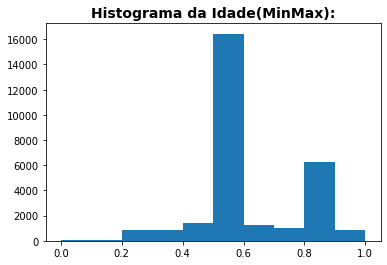

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = df_limpo.tempo_educacao.values

M = np.max(x)
m = np.min(x)

X_minmax = (x - m) / (M - m)

print("Informações - Tempo_Educação(MaxMin):\n")
print(pd.Series(X_minmax).describe())

plt.title("Histograma da Idade(MinMax):", fontsize= 14, fontweight='bold')
plt.hist(X_minmax)
plt.show()

In [36]:
# 9 - Detecte e elimine os outliers da variável 'idade'.

def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

df_limpo['outlier_idade'] = detecta_outlier(df_limpo.idade)
df_limpo = df_limpo.loc[df_limpo.outlier_idade == 0]
df_limpo


,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0
2,38.0,9,Divorced,White,Male,40,<=50K,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0


In [42]:
# 10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

import numpy as np
import matplotlib.pyplot as plt

def meu_dataset(df, cols_numericas=[], cols_categoricas=[]):
    print(f'Dataframe antes \n{df}')

    def preprocessamento(df, cols_numericas, cols_categoricas):
        dff = df.copy()
        temp = (df.isnull().sum() / df.shape[0]) >= 0.8
        variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
        
        for v in variaveis_80percFaltantes:
            dff = dff.drop(v, axis = 1)
            
        cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist())))
        cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist())))
            
        for v in cols_numericas:
            dff[v] = dff[v].fillna(dff[v].mean())
            
        for v in cols_categoricas:
            mode_v = dff[v].value_counts().idxmax()
            dff[v] = dff[v].fillna(mode_v)
        return dff

    df_limpo = preprocessamento(
            df = df,
            cols_numericas= ['idade', 'tempo_educacao', 'horas_por_semana'],
            cols_categoricas=['cor', 'sexo', 'estado_civil', 'salario_anual']
        )

    df_limpo

    moda_sexo = df_limpo.sexo.value_counts().idxmax()
    moda_cor = df_limpo.cor.value_counts().idxmax()

    df_limpo['moda_cor'] = df_limpo.cor.fillna(moda_cor)
    df_limpo['moda_sexo'] = df_limpo.sexo.fillna(moda_sexo)

    df_limpo = df_limpo.drop('cor', axis=1)
    df_limpo = df_limpo.drop('sexo', axis=1)

    df_limpo


    x = df_limpo.tempo_educacao.values
    M = np.max(x)
    m = np.min(x)
    X_minmax = (x - m) / (M - m)

    def detecta_outlier(x, limite = 1.5):
        iqr = np.percentile(x, 75) - np.percentile(x, 25)
        limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
        limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
        return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

    df_limpo['outlier_idade'] = detecta_outlier(df_limpo.idade)
    df_limpo = df_limpo.loc[df_limpo.outlier_idade == 0]

    print(f'Dataframe depois \n{df_limpo}')
    
    return df_limpo

df_limpo = meu_dataset(
            df = df,
            cols_numericas= ['idade', 'tempo_educacao', 'horas_por_semana'],
            cols_categoricas=['cor', 'sexo', 'estado_civil', 'salario_anual']
        )

Dataframe antes 
       idade  tempo_educacao        estado_civil    cor    sexo  \
0       39.0              13       Never-married  White    Male   
1       50.0              13  Married-civ-spouse  White    Male   
2       38.0               9            Divorced  White    Male   
3       53.0               7  Married-civ-spouse  Black    Male   
4       37.0              14  Married-civ-spouse  White  Female   
...      ...             ...                 ...    ...     ...   
29165   27.0              12  Married-civ-spouse  White  Female   
29166   40.0               9  Married-civ-spouse  White    Male   
29167   58.0               9             Widowed  White  Female   
29168   22.0               9       Never-married  White    Male   
29169   52.0               9  Married-civ-spouse  White  Female   

       horas_por_semana salario_anual  nome  dívida  
0                    40         <=50K   NaN     NaN  
1                    13         <=50K   NaN     NaN  
2               